In [1]:
import numpy as np
from scipy.stats import multivariate_normal, gamma, norm, f
from tqdm import tqdm
import pandas as pd

# %% set graphs style
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')

In [2]:
# %% Import data
df = pd.read_csv('cheese.csv')
# %% manipulate data to get design matrix
stores = df.groupby('store')
names = list(stores.groups.keys())
stores_X = []
stores_y = []
for name in names:
    df_store = stores.get_group(name)
    X = np.ones((df_store.shape[0], 4))
    X[:, 1] = np.log(df_store['price'])
    X[:, 2] = df_store['disp']
    X[:, 3] = df_store['disp'] * np.log(df_store['price'])
    y = np.log(df_store['vol']).to_numpy()
    stores_X.append(X)
    stores_y.append(y)

In [4]:
from cheese import Hierarchical
model = Hierarchical(stores_X, stores_y)
model.fit_GibbsSampler(n_iter=3000, burn=1000)

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [02:36<00:00, 19.15it/s]


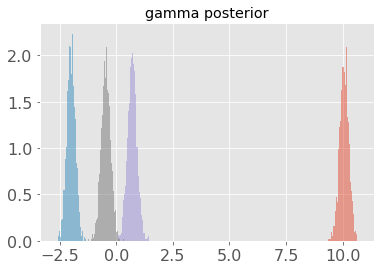

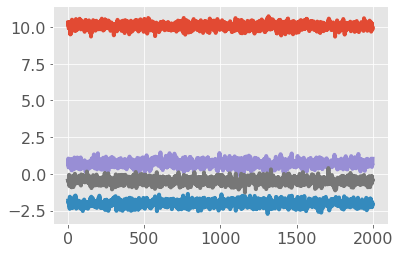

In [5]:
#%%
model.plot_gamma_histogram()
plt.plot(model.traces['gamma'])

In [ ]:
#%%
model.plot_all_posteriors()

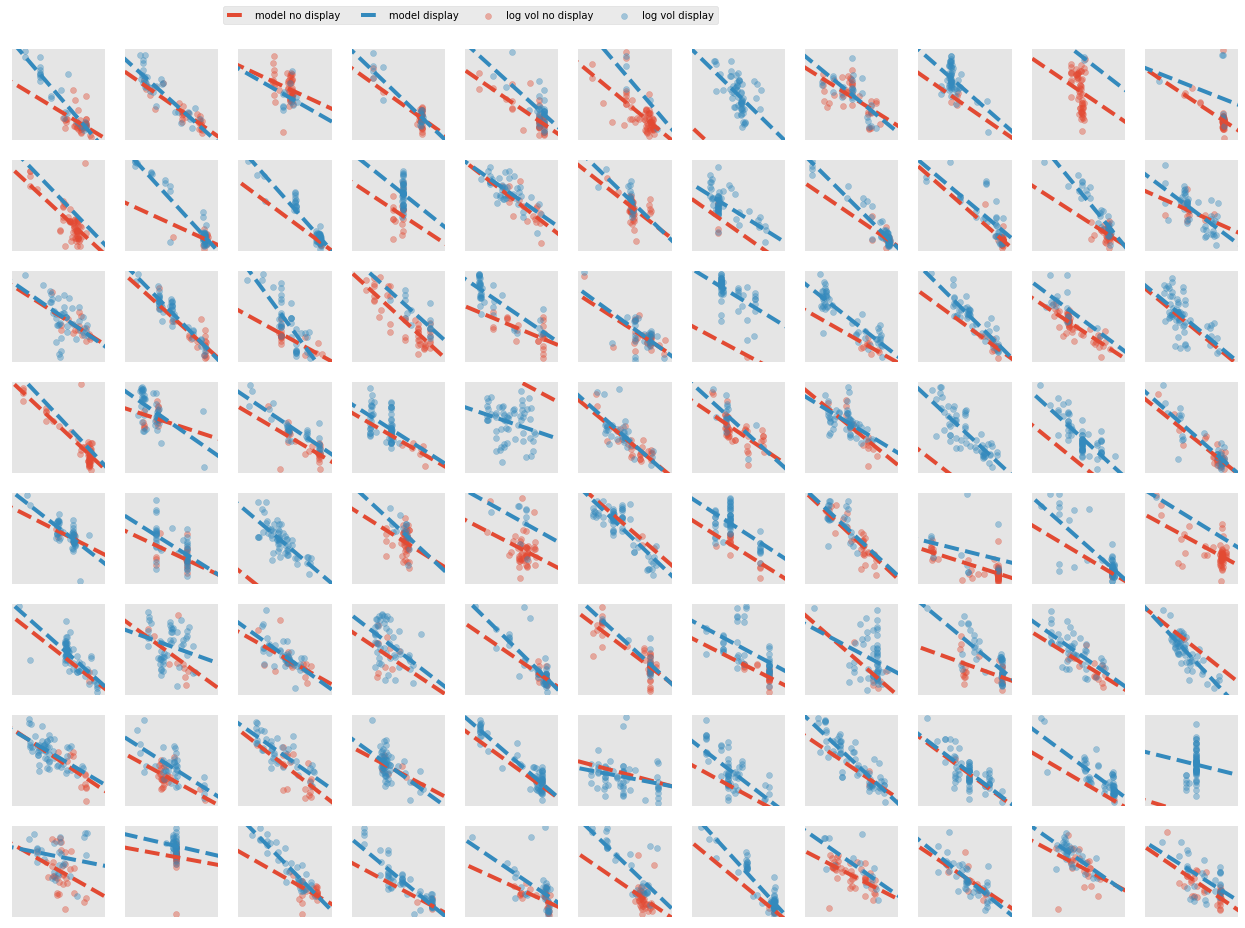

In [8]:
plt.figure(figsize=(22, 16)) #<- juliette's plot!!

for i in range(len(stores_y)):
    plt.subplot(8, 11, i+1)
    disp = stores_X[i][:, 2]
    plt.xticks([])
    plt.yticks([])
    plt.scatter(stores_X[i][disp == 0][:, 1], stores_y[i][disp == 0], alpha = .4, label='log vol no display')
    plt.scatter(stores_X[i][disp == 1][:, 1], stores_y[i][disp == 1], alpha = .4, label='log vol display') 
    
    betas = model.traces['betas'].mean(axis=0)[:,i]
    X_plot = np.linspace(0,20,100)
    y_no_disp = X_plot*betas[1] + betas[0]
    y_disp = X_plot*(betas[1]+betas[3]) + betas[0] + betas[2]
    
    plt.plot(X_plot, y_no_disp, linestyle='--', label='model no display')
    plt.plot(X_plot, y_disp, linestyle='--', label='model display')
    plt.xlim(stores_X[i][:, 1].min() - 0.1 , stores_X[i][:, 1].max() + 0.1)
    plt.ylim(stores_y[i].min() - 0.1 , stores_y[i].max() + 0.1)
    if i == 0:
        plt.legend(bbox_to_anchor=(2.2,1.5),ncol=4) 